<a href="https://colab.research.google.com/github/sheemambabu/CMPE-258-Deep-Learning/blob/main/Assignment%201/Assignment%201%20part%201/CMPE_258_Assignment_1_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMPE-258 Deep Learning**

## Assignment 1 

## By: Sheema Murugesh Babu (SJSU_ID: 015217176)

### Part 1: Blackbox deep learning 

In [ ]:
! pip install -Uqq fastbook

     |████████████████████████████████| 727kB 16.4MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 1.2MB 48.5MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 61kB 11.9MB/s 


In [ ]:
# Importing fastbook

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

#**Image classification using CNN Learner**

In [ ]:
# Importing the necessary libraries

from fastai.vision.all import *
data_path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
      data_path, get_image_files(data_path), valid_pct=0.2, seed=42,
      label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.129050,0.026457,0.006089,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.059792,0.024068,0.004736,00:55


In [ ]:
# Uploading a dog image

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

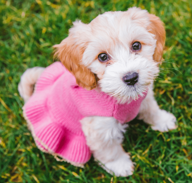

In [ ]:
image = PILImage.create(uploader.data[0])
image.to_thumb(192)

In [ ]:
is_dog,_,probs = learn.predict(image)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999995


#### The above code gives us a positive scenario saying that the image uploaded was a **'dog'** image. Let's try out a negative scenario and check wether our model performs aptly or not.

In [ ]:
# Uploading a cat image

uploader_1 = widgets.FileUpload()
uploader_1

FileUpload(value={}, description='Upload')

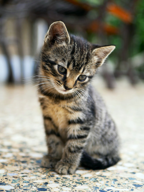

In [ ]:
image_2 = PILImage.create(uploader_1.data[0])
image_2.to_thumb(192)

In [ ]:
is_dog,_,probs = learn.predict(image_2)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: False.
Probability it's a dog: 0.000000


#### Success! The model correctly predicts that the image uploaded was not a dog image and the respective probability is nil.

#**Segmentation using UNet Learner**

In [ ]:
# Loading the data from Camvid dataset
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames= get_image_files(path/"images"),
    label_func =lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.804272,2.251108,00:01


epoch,train_loss,valid_loss,time
0,1.839057,1.554935,00:01
1,1.566081,1.166011,00:01
2,1.462492,1.394571,00:01
3,1.343500,1.106575,00:01
4,1.228710,0.975556,00:01
5,1.127903,0.887007,00:01
6,1.037952,0.827697,00:01
7,0.964968,0.822496,00:01


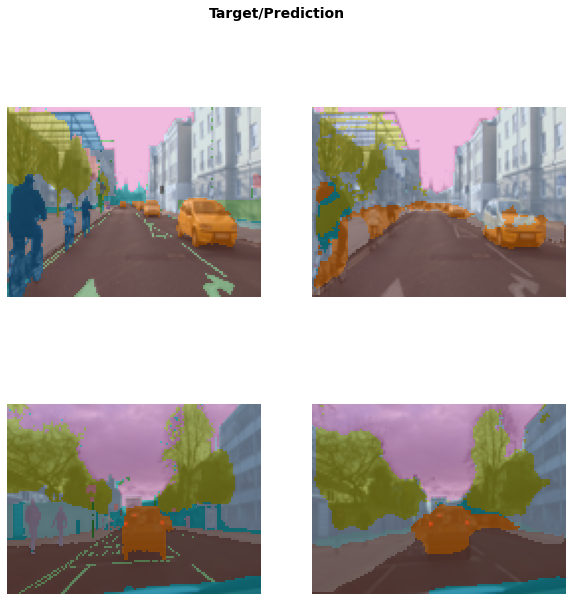

In [ ]:
learn.show_results(max_n=7, figsize=(10,10))

# **Sentiment analysis using text_classifier_learner**

In [ ]:
from fastai.text.all import *

In [ ]:
# Loading the data from IMDB Large Movie Review dataset
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.473403,0.402644,0.822880,03:56


epoch,train_loss,valid_loss,accuracy,time
0,0.310398,0.242392,0.905200,07:36
1,0.250227,0.202638,0.920520,07:37
2,0.192271,0.192004,0.926640,07:35
3,0.137302,0.187741,0.930400,07:36


In [ ]:
learn.predict("That was an awesome movie!")

('pos', tensor(1), tensor([0.0029, 0.9971]))

In [ ]:
learn.predict("The movie was not that great")

('neg', tensor(0), tensor([0.7654, 0.2346]))

In [ ]:
learn.predict("It was very boring and monotonous")

('neg', tensor(0), tensor([9.9967e-01, 3.2656e-04]))

#**Decision tree using tabular_learner**

In [ ]:
from fastai.tabular.all import *

In [ ]:
# Loading the data from Adult dataset

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.370169,0.351314,0.838606,00:05
1,0.350470,0.341789,0.845670,00:05
2,0.348412,0.337810,0.846744,00:05


#**Ranking using collab_learner**

In [ ]:
from fastai.collab import *

In [ ]:
# Loading the data from MovieLens dataset

path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))

learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497539,1.424132,00:00


epoch,train_loss,valid_loss,time
0,1.362912,1.368166,00:00
1,1.274229,1.197982,00:00
2,1.029975,0.898914,00:00
3,0.806043,0.753159,00:00
4,0.690520,0.718574,00:00
5,0.651968,0.709240,00:00
6,0.615707,0.703566,00:00
7,0.591686,0.701510,00:00
8,0.599095,0.700377,00:00
9,0.592934,0.700309,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,13.0,50.0,4.0,3.922384
1,95.0,21.0,3.0,3.657287
2,60.0,1.0,4.5,4.174328
3,53.0,50.0,5.0,4.149423
4,4.0,61.0,5.0,4.241913
5,59.0,14.0,3.5,4.671744
6,49.0,90.0,4.0,4.148612
7,95.0,81.0,4.0,4.200567
8,35.0,45.0,3.5,3.222820
